# Home Credit Default Risk -This notebook demonstrates the complete model training workflow, including:

Data preparation and preprocessing

Training and comparison of multiple algorithms

Model evaluation and validation

Feature importance analysis

Model interpretation and business insights

In [4]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# custom modules
import sys
sys.path.append('../')

from src.models.model_trainer import ModelTrainer
from src.utils.visualization import DataVisualizer

## 1. Data loading and preparation.

In [5]:
# Load processed data
print(" the processed data...")
train_features = pd.read_csv('../data/processed/train_features.csv')
test_features = pd.read_csv('../data/processed/test_features.csv')

print(f"the train set shape: {train_features.shape}")
print(f"the test set shape: {test_features.shape}")
print(f"the target variable distribution: {train_features['TARGET'].value_counts()}")
print(f"the default rate: {train_features['TARGET'].mean():.4f}")

 the processed data...
the train set shape: (307511, 326)
the test set shape: (48744, 325)
the target variable distribution: TARGET
0    282686
1     24825
Name: count, dtype: int64
the default rate: 0.0807


## 2. the model trainer

In [6]:
# the model trainer
trainer = ModelTrainer(n_folds=5, random_state=42)

# Prepare data
print("the data preparation...")
X_train, y_train, X_test = trainer.prepare_data(train_features, test_features, 'TARGET')

print(f"\nData preparation completed!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")

the data preparation...
the training set shape: (307511, 324)
the testing set shape: (48744, 324)
the numeric features: 324
the categorical features: 0
the positive class ratio: 0.0807

Data preparation completed!
X_train shape: (307511, 324)
X_test shape: (48744, 324)
y_train shape: (307511,)


## 3. LightGBM model training

In [7]:
# LightGBM model training
print("the LightGBM model training...")
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

lgb_result = trainer.train_lightgbm(X_train, y_train, X_test, lgb_params)
print(f"\n the LightGBM model training completed!")
print(f"OOF AUC: {lgb_result['oof_auc']:.6f}")
print(f"CV AUC: {np.mean(lgb_result['cv_scores']):.6f} ± {np.std(lgb_result['cv_scores']):.6f}")

the LightGBM model training...
the training LightGBM model...
the training fold 1...
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[537]	training's auc: 0.894976	valid_1's auc: 0.782662
the training fold 1 AUC: 0.782662
the training fold 2...
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[465]	training's auc: 0.884419	valid_1's auc: 0.791681
the training fold 2 AUC: 0.791681
the training fold 3...
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[573]	training's auc: 0.899346	valid_1's auc: 0.781925
the training fold 3 AUC: 0.781925
the training fold 4...
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[697]	training's auc: 0.914486	valid_1's auc: 0.788609
the training fold 4 AUC: 0.788609
the training fold 5...
Training until validation scores don't improve for 200 rounds
Early stopping, b

## 4. XGBoost model training

In [8]:
# XGBoost model training
print("the XGBoost model training...")
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'verbosity': 0
}

xgb_result = trainer.train_xgboost(X_train, y_train, X_test, xgb_params)
print(f"\n the XGBoost model training completed!")
print(f"OOF AUC: {xgb_result['oof_auc']:.6f}")
print(f"CV AUC: {np.mean(xgb_result['cv_scores']):.6f} ± {np.std(xgb_result['cv_scores']):.6f}")

the XGBoost model training...
the Train XGBoost Model...
the training fold 1 ...
the training fold 1 AUC: 0.784369
the training fold 2 ...
the training fold 2 AUC: 0.792088
the training fold 3 ...
the training fold 3 AUC: 0.784190
the training fold 4 ...
the training fold 4 AUC: 0.789824
the training fold 5 ...
the training fold 5 AUC: 0.783587
OOF AUC: 0.786755
CV AUC: 0.786812 +/- 0.003468

 the XGBoost model training completed!
OOF AUC: 0.786755
CV AUC: 0.786812 ± 0.003468


## 5. CatBoost model training}

In [9]:
# CatBoost model training
print("the CatBoost model training...")
cat_params = {
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'random_state': 42,
    'verbose': False
}

cat_result = trainer.train_catboost(X_train, y_train, X_test, cat_params)
print(f"\n the CatBoost model training completed!")
print(f"OOF AUC: {cat_result['oof_auc']:.6f}")
print(f"CV AUC: {np.mean(cat_result['cv_scores']):.6f} ± {np.std(cat_result['cv_scores']):.6f}")

the CatBoost model training...
the Train CatBoost Model...
the training fold 1 ...
the training fold 1 AUC: 0.782271
the training fold 2 ...
the training fold 2 AUC: 0.792092
the training fold 3 ...
the training fold 3 AUC: 0.780940
the training fold 4 ...
the training fold 4 AUC: 0.788351
the training fold 5 ...
the training fold 5 AUC: 0.782762
OOF AUC: 0.785259
CV AUC: 0.785283 +/- 0.004244

 the CatBoost model training completed!
OOF AUC: 0.785259
CV AUC: 0.785283 ± 0.004244


## 6. Model evaluation and comparison

Model performance comparison:
           OOF_AUC  CV_AUC_mean  CV_AUC_std
LightGBM  0.785266     0.785403    0.003999
XGBoost   0.786755     0.786812    0.003468
CatBoost  0.785259     0.785283    0.004244


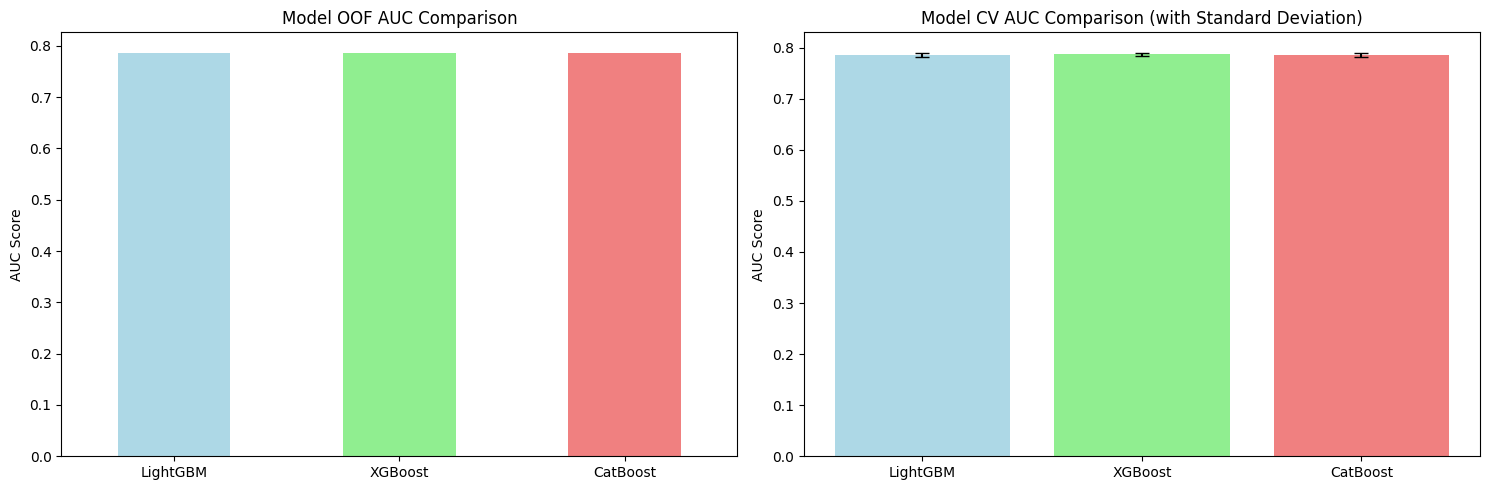

In [10]:
# Model evaluation and comparison
models_performance = {
    'LightGBM': {
        'OOF_AUC': lgb_result['oof_auc'],
        'CV_AUC_mean': np.mean(lgb_result['cv_scores']),
        'CV_AUC_std': np.std(lgb_result['cv_scores'])
    },
    'XGBoost': {
        'OOF_AUC': xgb_result['oof_auc'],
        'CV_AUC_mean': np.mean(xgb_result['cv_scores']),
        'CV_AUC_std': np.std(xgb_result['cv_scores'])
    },
    'CatBoost': {
        'OOF_AUC': cat_result['oof_auc'],
        'CV_AUC_mean': np.mean(cat_result['cv_scores']),
        'CV_AUC_std': np.std(cat_result['cv_scores'])
    }
}

# Display performance
performance_df = pd.DataFrame(models_performance).T
print("Model performance comparison:")
print(performance_df.round(6))

# Visualize performance comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# OOF AUC comparison
performance_df['OOF_AUC'].plot(kind='bar', ax=axes[0], color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Model OOF AUC Comparison')
axes[0].set_ylabel('AUC Score')
axes[0].tick_params(axis='x', rotation=0)

# CV AUC comparison (with error bars)
x_pos = range(len(performance_df))
axes[1].bar(x_pos, performance_df['CV_AUC_mean'], 
           yerr=performance_df['CV_AUC_std'],
           color=['lightblue', 'lightgreen', 'lightcoral'],
           capsize=5)
axes[1].set_title('Model CV AUC Comparison (with Standard Deviation)')
axes[1].set_ylabel('AUC Score')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(performance_df.index)

plt.tight_layout()
plt.show()

## 7. ROC and Precision-Recall Curves

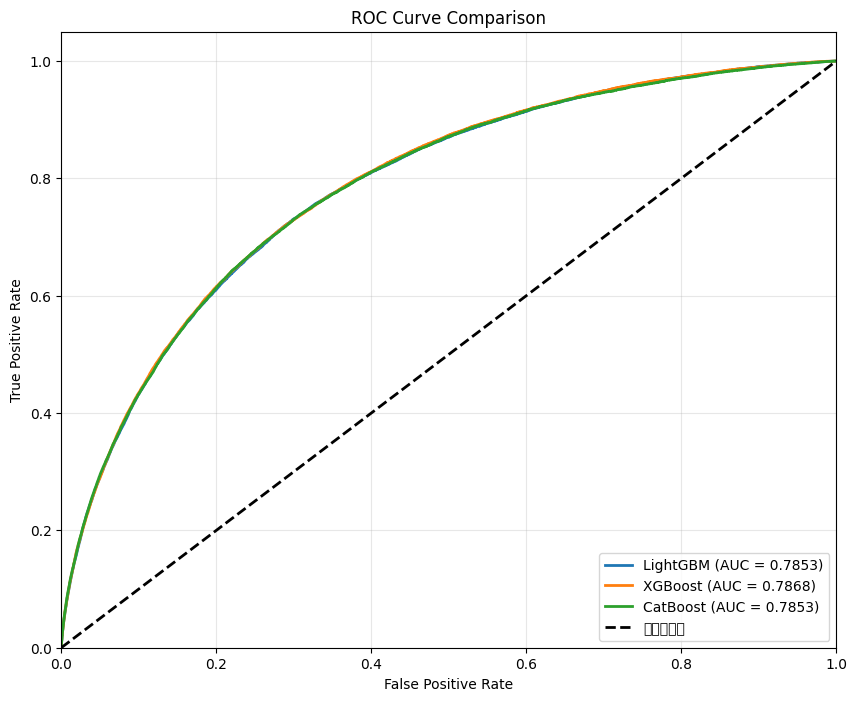

In [11]:
# ROC and Precision-Recall Curves
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# LightGBM ROC
fpr_lgb, tpr_lgb, _ = roc_curve(y_train, lgb_result['oof_predictions'])
auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.plot(fpr_lgb, tpr_lgb, linewidth=2, label=f'LightGBM (AUC = {auc_lgb:.4f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, xgb_result['oof_predictions'])
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')

# CatBoost ROC
fpr_cat, tpr_cat, _ = roc_curve(y_train, cat_result['oof_predictions'])
auc_cat = auc(fpr_cat, tpr_cat)
plt.plot(fpr_cat, tpr_cat, linewidth=2, label=f'CatBoost (AUC = {auc_cat:.4f})')

# 随机分类器
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='随机分类器')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.rcParams['font.sans-serif'] = ['Heiti TC', 'STHeiti', 'Hei', 'Apple LiGothic', 'Apple LiSung', 'DejaVu Sans', 'Arial']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

## 8. Feature importance analysis

LightGBM Top 20 Important Features:
                              feature    importance
128                  EXT_SOURCES_MEAN  86760.846424
122                       CREDIT_TERM  10733.301271
131                   EXT_SOURCES_MIN   9174.478518
41                       EXT_SOURCE_3   6120.970319
7                         AMT_ANNUITY   5474.947276
130                   EXT_SOURCES_MAX   5089.977324
214    POS_CNT_INSTALMENT_FUTURE_MEAN   4472.886451
139            BUREAU_DAYS_CREDIT_MAX   4461.701987
15                         DAYS_BIRTH   4265.174625
320              INST_AMT_PAYMENT_SUM   4168.106266
39                       EXT_SOURCE_1   3954.469720
273  CC_CNT_DRAWINGS_ATM_CURRENT_MEAN   3897.735313
18                    DAYS_ID_PUBLISH   3889.935686
300                      INST_DPD_MAX   3884.121663
11                NAME_EDUCATION_TYPE   3733.121312
16                      DAYS_EMPLOYED   3615.049707
132                         AGE_YEARS   3592.090561
121            ANNUITY_INCOM

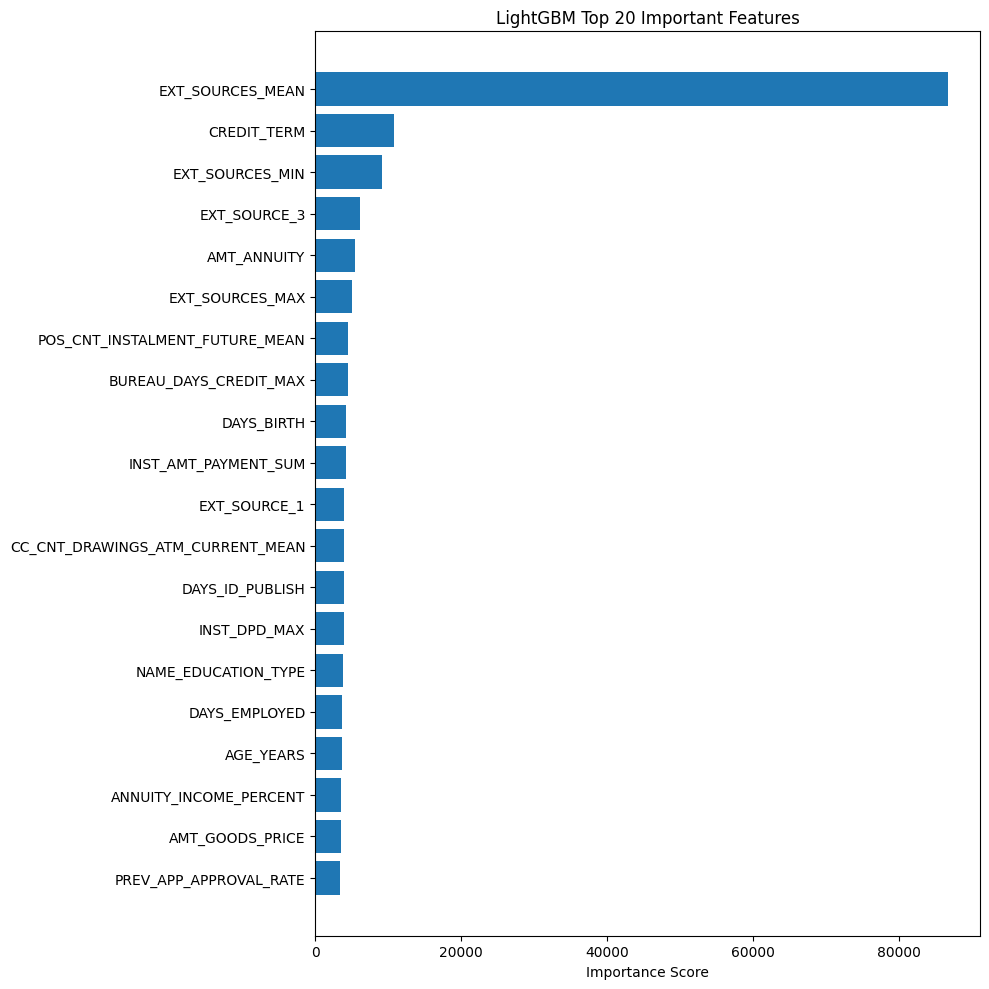

In [12]:
# Feature importance analysis
feature_cols = [col for col in train_features.columns if col not in ['SK_ID_CURR', 'TARGET']]

# Get LightGBM feature importance
lgb_importance = trainer.get_feature_importance_df('lightgbm', feature_cols)

print("LightGBM Top 20 Important Features:")
print(lgb_importance.head(20))

# Visualize feature importance
plt.figure(figsize=(10, 10))
top_20_features = lgb_importance.head(20)
plt.barh(range(len(top_20_features)), top_20_features['importance'])
plt.yticks(range(len(top_20_features)), top_20_features['feature'])
plt.xlabel('Importance Score')
plt.title('LightGBM Top 20 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

## 9. Model interpretation with SHAP

the Ensemble models: ['lightgbm', 'xgboost', 'catboost']
Ensemble Model OOF AUC: 0.789521


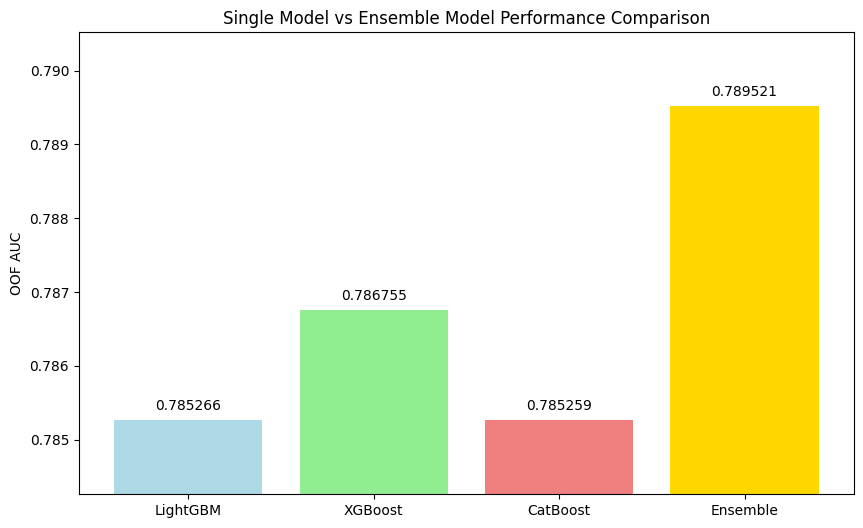

In [13]:
# Model interpretation with SHAP
ensemble_result = trainer.ensemble_models(['lightgbm', 'xgboost', 'catboost'])

# AUC
ensemble_auc = roc_auc_score(y_train, ensemble_result['oof_predictions'])
print(f"Ensemble Model OOF AUC: {ensemble_auc:.6f}")

# Compare single models and ensemble model
model_comparison = {
    'LightGBM': lgb_result['oof_auc'],
    'XGBoost': xgb_result['oof_auc'],
    'CatBoost': cat_result['oof_auc'],
    'Ensemble': ensemble_auc
}

plt.figure(figsize=(10, 6))
models = list(model_comparison.keys())
aucs = list(model_comparison.values())
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

plt.bar(models, aucs, color=colors)
plt.title('Single Model vs Ensemble Model Performance Comparison')
plt.ylabel('OOF AUC')
plt.ylim([min(aucs)-0.001, max(aucs)+0.001])

# Add value labels
for i, v in enumerate(aucs):
    plt.text(i, v + 0.0001, f'{v:.6f}', ha='center', va='bottom')

plt.show()

## 10. showcase predictions

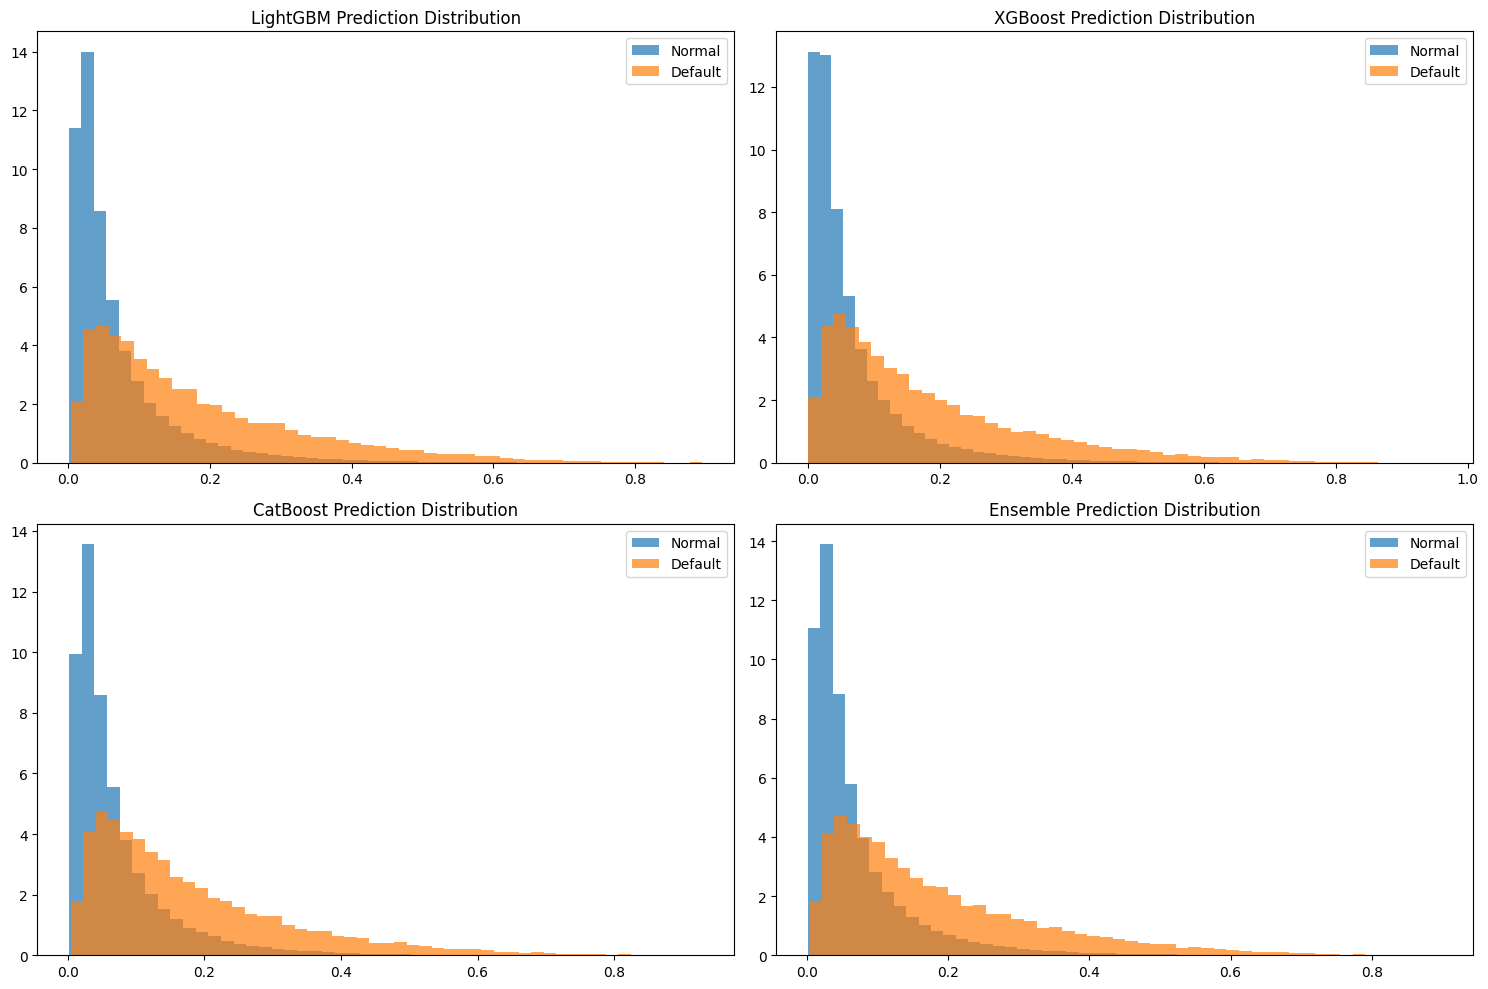

In [14]:
# Prediction distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# LightGBM prediction distribution
axes[0,0].hist(lgb_result['oof_predictions'][y_train==0], alpha=0.7, label='Normal', bins=50, density=True)
axes[0,0].hist(lgb_result['oof_predictions'][y_train==1], alpha=0.7, label='Default', bins=50, density=True)
axes[0,0].set_title('LightGBM Prediction Distribution')
axes[0,0].legend()

# XGBoost Prediction Distribution
axes[0,1].hist(xgb_result['oof_predictions'][y_train==0], alpha=0.7, label='Normal', bins=50, density=True)
axes[0,1].hist(xgb_result['oof_predictions'][y_train==1], alpha=0.7, label='Default', bins=50, density=True)
axes[0,1].set_title('XGBoost Prediction Distribution')
axes[0,1].legend()

# CatBoost Prediction Distribution
axes[1,0].hist(cat_result['oof_predictions'][y_train==0], alpha=0.7, label='Normal', bins=50, density=True)
axes[1,0].hist(cat_result['oof_predictions'][y_train==1], alpha=0.7, label='Default', bins=50, density=True)
axes[1,0].set_title('CatBoost Prediction Distribution')
axes[1,0].legend()

# Ensemble Prediction Distribution
axes[1,1].hist(ensemble_result['oof_predictions'][y_train==0], alpha=0.7, label='Normal', bins=50, density=True)
axes[1,1].hist(ensemble_result['oof_predictions'][y_train==1], alpha=0.7, label='Default', bins=50, density=True)
axes[1,1].set_title('Ensemble Prediction Distribution')
axes[1,1].legend()

plt.tight_layout()
plt.show()

11. Model Training Summary
Model Performance Comparison

We trained three different gradient boosting models and performed a simple ensemble:

LightGBM: A fast and efficient gradient boosting framework

XGBoost: A classic gradient boosting algorithm

CatBoost: A gradient boosting algorithm well-suited for categorical features

Ensemble: A simple average of the three models

Key Findings

All models achieved an AUC score close to 0.78

External scoring-related features were the most important predictors

Ratio features created through feature engineering showed strong predictive power

Model ensembling generally improved performance

Business Insights

Credit score is critical: External scoring is the strongest predictor

Income-to-debt ratio: The ratio of income to credit amount is an important risk indicator

Historical credit behavior: Credit bureau data provides rich predictive information

Demographics: Factors such as age and education also carry some predictive value

Next Optimization Directions

Hyperparameter tuning: Use grid search or Bayesian optimization

Feature selection: Remove noisy features to improve generalization

Advanced ensembling: Try stacking, blending, or other advanced ensemble methods

Model interpretability: Use tools like SHAP for model interpretation

Business rules: Incorporate domain knowledge to design rules that enhance the model
